In [1]:
# import the necessary pacakges

import pandas as pd
from pandas import Series, DataFrame 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
!pip install pandas-datareader

In [3]:
# from pandas.io.data import DataReader

In [4]:
from pandas_datareader import data as pdr, wb

In [5]:
from datetime import datetime

In [6]:
from __future__ import division

In [7]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [8]:
end = datetime.now()

start = datetime(end.year-1, end.month, end.day)

In [9]:
!pip install yfinance

In [10]:
import yfinance as yf
yf.pdr_override()
    
lt = []
for stock in tech_list:
    #globals()[stock] = data.DataReader(stock, 'yahoo', start, end)
    temp_df = pdr.get_data_yahoo(stock, start, end)
    temp_df = temp_df.reset_index()
    lt.append(temp_df)

df = pd.concat([lt[0], lt[1], lt[2], lt[3]], axis=0)
df = df.reset_index(drop=True)
print(df.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AMZN: No data found for this date range, symbol may be delisted
        Date        Open        High         Low       Close   Adj Close  \
0 2021-12-22  173.039993  175.860001  172.149994  175.639999  174.626495   
1 2021-12-23  175.850006  176.850006  175.270004  176.279999  175.262817   
2 2021-12-27  177.089996  180.419998  177.070007  180.330002  179.289444   
3 2021-12-28  180.160004  181.330002  178.529999  179.289993  178.255432   
4 2021-12-29  179.330002  180.630005  178.139999  179.380005  178.344925   

       Volume  
0  92135300.0  
1  68356600.0  
2  74919600.0  
3  79144300.0  
4  62348900.0  


In [11]:
AAPL = lt[0]
GOOG = lt[1]
MSFT = lt[2]
AMZN = lt[3]

In [12]:
GOOG.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-22,144.100006,147.302994,143.962997,146.949005,146.949005,18438000
1,2021-12-23,147.089493,148.572601,146.950851,147.142502,147.142502,13818000
2,2021-12-27,147.463501,148.426498,147.250000,148.063995,148.063995,13256000
3,2021-12-28,148.374496,148.374496,145.935501,146.447998,146.447998,18624000
4,2021-12-29,146.429504,147.183746,145.504501,146.504501,146.504501,17022000


In [13]:
GOOG.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
248,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48472500
249,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.150002,23020500
250,2022-12-20,88.730003,89.779999,88.040001,89.629997,89.629997,21976800
251,2022-12-21,89.730003,90.915001,88.910004,90.250000,90.250000,20325100


In [14]:
print(GOOG.head())
print('')
print(MSFT.head())
print('')
print(AMZN.head())
print('')


        Date        Open        High         Low       Close   Adj Close  \
0 2021-12-22  144.100006  147.302994  143.962997  146.949005  146.949005   
1 2021-12-23  147.089493  148.572601  146.950851  147.142502  147.142502   
2 2021-12-27  147.463501  148.426498  147.250000  148.063995  148.063995   
3 2021-12-28  148.374496  148.374496  145.935501  146.447998  146.447998   
4 2021-12-29  146.429504  147.183746  145.504501  146.504501  146.504501   

     Volume  
0  18438000  
1  13818000  
2  13256000  
3  18624000  
4  17022000  

        Date        Open        High         Low       Close   Adj Close  \
0 2021-12-22  328.299988  333.609985  325.750000  333.200012  330.106873   
1 2021-12-23  332.750000  336.390015  332.730011  334.690002  331.583008   
2 2021-12-27  335.459991  342.480011  335.429993  342.450012  339.270996   
3 2021-12-28  343.149994  343.809998  340.320007  341.250000  338.082123   
4 2021-12-29  341.299988  344.299988  339.679993  341.950012  338.775665   

 

<AxesSubplot:>

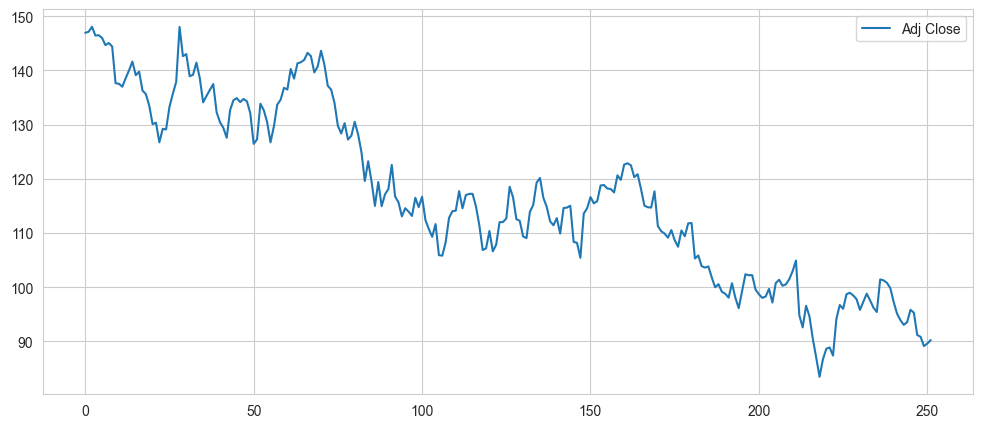

In [15]:
GOOG['Adj Close'].plot(legend = True, figsize = (12,5))

In [16]:
# Q. What are the conclusions that can be drawn from the given graph?

<AxesSubplot:>

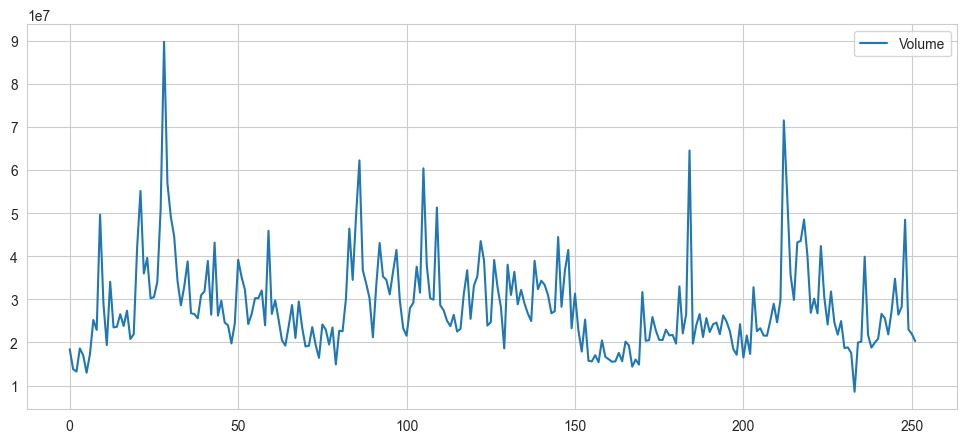

In [17]:
GOOG['Volume'].plot(legend = True, figsize = (12,5))

In [18]:
# Q. What are the conclusions that can be drawn from the given graph?

In [19]:
# Calculating moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    GOOG[column_name] = GOOG['Adj Close'].rolling(ma).mean()

<AxesSubplot:>

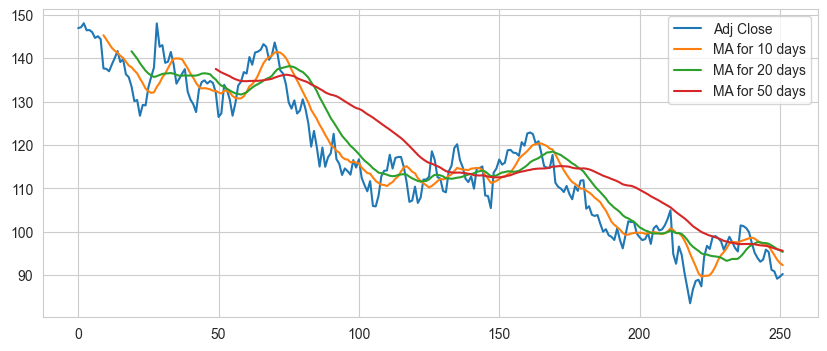

In [20]:
GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize = (10,4))

In [21]:
# Q. What are the conclusions that can be drawn from the given graph?

<AxesSubplot:>

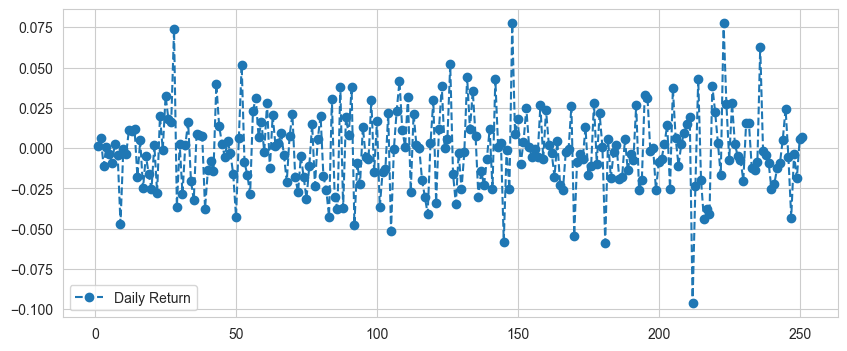

In [22]:
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()

GOOG['Daily Return'].plot(figsize = (10,4), legend = True, linestyle = '--', marker = 'o')

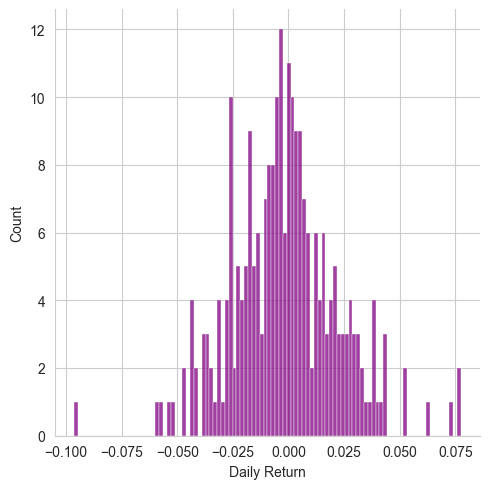

In [23]:
sns.displot(GOOG['Daily Return'].dropna(), bins = 100, color = 'purple')

In [24]:
# Q. Draw the conclusions for the rest 3 companies